In [31]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### HAM WORDS

In [11]:
ham_words = ' '.join(df[df["Category"] == 'ham']['Message'].values)

In [12]:
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [13]:
len(ham_words)

349562

In [10]:
# we need to se frequency of diff ham words for that we use a library here in text called "WORDCLOUD"

In [15]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from wordcloud import WordCloud

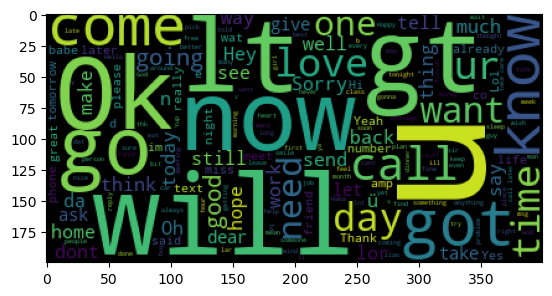

In [19]:
ham_plot = WordCloud().generate(ham_words)
plt.imshow(ham_plot)

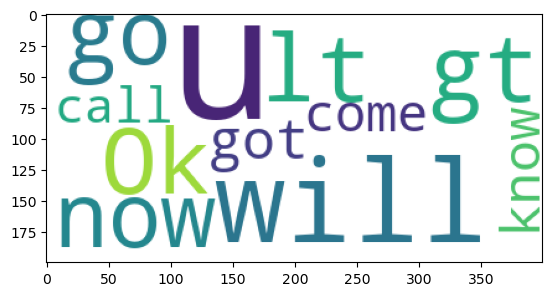

In [23]:
ham_plot = WordCloud(background_color='white',max_words=10).generate(ham_words)# to change bg_color and specific number of words to get we use it 
plt.imshow(ham_plot)

## SPAM WORDS

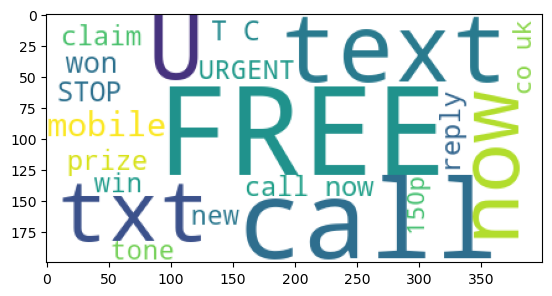

In [25]:
spam_words = ' '.join(df[df["Category"] == 'spam']['Message'].values)
#pip install wordcloud
spam_plot = WordCloud(background_color='white',max_words=20).generate(spam_words)# to change bg_color and specific number of words to get we use it 
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

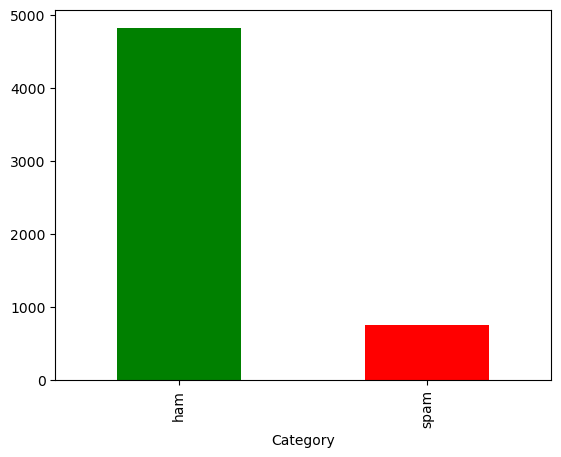

In [29]:
df["Category"].value_counts().plot(kind='bar',color=["green","red"])

### Splitting data into input and output

In [36]:
x = df['Message']
y= df["Category"]

### Bag of words  ((vectorisation)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
bow = CountVectorizer(stop_words='english')

In [37]:
bow.fit(x)
X=bow.transform(x).toarray()
Y=y

### data spliiting for model 80/20

In [38]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

In [50]:
X_train.shape

(4457, 8440)

In [51]:
Y_train.shape

(4457,)

### Apply alogorithmns

### knn

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9022421524663677

### Naive bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
nb = MultinomialNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.9820627802690582

### SVC

In [58]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train,Y_train)
Y_pred = sv.predict(X_test)
accuracy_score(Y_test,Y_pred)

### Decesion tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
accuracy_score(Y_test,Y_pred)

### Deployment

In [62]:
email = input("Enter the Email ID:")
Data = bow.transform([email]).toarray()
nb.predict(Data)[0]

Enter the Email ID:Immediate Action Required: Virus Detected on Your Computer


'spam'

In [65]:
email = input("Enter the Email ID:")
Data = bow.transform([email]).toarray()
Result=nb.predict(Data)[0]
Result
if result == 'spam'

Enter the Email ID:WIN a FREE vacation!


'spam'

### pickling

In [67]:
import pickle

In [72]:
#pickle.dump(nb,open("nb.pkl","wb"))
pickle.dump(dt,open("dt.pkl","wb"))

In [73]:
bow = CountVectorizer(stop_words='english')
bow.fit(df['Message'])
pickle.dump(bow,open(r"C:\Users\HP\AI ELITE 20\bow.pkl","wb"))